# Polynomial Regression Implementation


## 1. Considerations
*__Polynomial Regression__ is a form of regression analysis in which the relationship between the independent variables and dependent variables are modeled in the nth degree polynomial.*<br>

*Polynomial Regression is a special case of Linear Regression where we fit the polynomial equation on the data with a curvilinear relationship between the dependent and independent variables.*

$$
    \text{linear} \: ax+b=0
$$
$$
    \text{quadratic} \: ax^2+bx+c=0
$$
$$
    \text{cubic} \: ax^3+bx^2+cx+d=0
$$

__Advantages of Polynomial Regression__
- Polynomial Regression does not require the relationship between the independent and dependent variables to be linear in the data set,This is also one of the main difference between the Linear and Polynomial Regression.
- Polynomial Regression is generally used when the points in the data are not captured by the Linear Regression Model and the Linear Regression fails in describing the best result clearly.

#### 1.1 Analytical Solution


#### 1.2 Choses mathématiques
$$\forall x \in \mathbb{R}$$
$$y = ax^2+bx+c$$
$$Err = \sum_{i=1}^{n}(y - (ax^2+bx+c))^2$$
$$Err = \sum_{i=1}^{n}(y - ax^2-bx-c)^2$$
$$ = \sum_{i=1}^{n}(y - ax^2-bx-c)^2$$

<br>
<br>
<br>

$$\frac{\partial Err}{\partial a} = \sum_{i=1}^{n}-2x^2(y-ax^2-bx-c)$$
$$0 = -2\sum x^2y + 2a\sum x^4+ 2b\sum x^3 + 2c\sum x^2$$ 
$$0 = -\sum x^2y + a\sum x^4+ b\sum x^3 + c\sum x^2$$ 

<br>
<br>
<br>

$$\frac{\partial Err}{\partial b} = \sum_{i=1}^{n}-2x(y-ax^2-bx-c)$$
$$0 = -2\sum xy + 2a\sum x^3+ 2b\sum x^2 + 2c\sum x$$
$$0 = -\sum xy + a\sum x^3+ b\sum x^2 + c\sum x$$
<br>
<br>
<br>

$$\frac{\partial Err}{\partial c} = \sum_{i=1}^{n}-2(y-ax^2-bx-c)$$
$$0 = -2\sum y + 2a\sum x^2+ 2b\sum x + 2cn$$
$$0 = -\sum y + a\sum x^2+ b\sum x + cn$$

<br>

<br>

<br>


$$
\text{Matrix Form}\\
\begin{bmatrix}
\sum x^4 & \sum x^3 & \sum x^2 \\
\sum x^3 & \sum x^2 & \sum x \\
\sum x^2 & \sum x & n \\
\end{bmatrix}
\begin{bmatrix}
a\\
b\\
c\\
\end{bmatrix}
=
\begin{bmatrix}
\sum x^2y \\
\sum xy \\
\sum y\\
\end{bmatrix}
$$

<br>

<br>

<br>


$$
\text{ Final Formula}\\
\begin{bmatrix}
a\\
b\\
c\\
\end{bmatrix}
=
\begin{bmatrix}
\sum x^4 & \sum x^3 & \sum x^2 \\
\sum x^3 & \sum x^2 & \sum x \\
\sum x^2 & \sum x & n \\
\end{bmatrix}^{-1}
\begin{bmatrix}
\sum x^2y \\
\sum xy \\
\sum y\\
\end{bmatrix}
$$
<br>



#### 1.3 NumPy Implementation 

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [68]:
data = pd.read_csv("./data/tvmarketing.csv")
x = data["TV"].values
y = data["Sales"].values


$$
\text{ Final Formula}\\
\begin{bmatrix}
a\\
b\\
c\\
\end{bmatrix}
=
\begin{bmatrix}
\sum x^4 & \sum x^3 & \sum x^2 \\
\sum x^3 & \sum x^2 & \sum x \\
\sum x^2 & \sum x & n \\
\end{bmatrix}^{-1}
\begin{bmatrix}
\sum x^2y \\
\sum xy \\
\sum y\\
\end{bmatrix}
$$

In [69]:
def polynomial_regression(x,y):
    # coeficents = Y * inverse(A)
    n = x.shape[0]

    _Y = np.array([[(np.power(x,2)*y).sum()], [(x*y).sum()], [y.sum()]])

    _A = np.array([
        [np.power(x,4).sum(), np.power(x,4).sum(), np.power(x,3).sum()], 
        [np.power(x,3).sum(), np.power(x,2).sum(), x.sum()], 
        [np.power(x,2).sum(), x.sum(), n]])

    _coef = np.dot(np.linalg.inv(_A),_Y).reshape(-1)

    
    return (_coef[0], _coef[1], _coef[2])

def polynomial_regression_predict(x, a, b, c):
    predicted = a*(x**2) + b*x + c
    return predicted

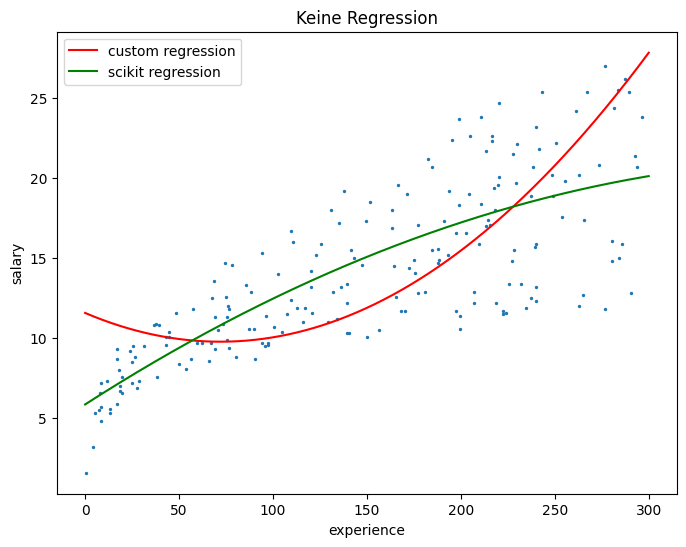

In [70]:
x_train = x[:int(len(x)*0.8)]
x_test = x[int(len(x)*0.8):]
y_train = y[:int(len(x)*0.8)]
y_test = y[int(len(x)*0.8):]

# Calculate slope and intercept using custom regression
a, b, c = polynomial_regression(x_train,y_train)

# Create a PolynomialFeatures object to transform the features
poly_features = PolynomialFeatures(degree=2)  # 2nd-degree polynomial
# Transform the original features into polynomial features
x_train_poly = poly_features.fit_transform(x_train.reshape(-1, 1))
# Create and fit a linear regression model
model = LinearRegression()
model.fit(x_train_poly, y_train)

# Adjust the figure size
plt.figure(figsize=(8, 6))  # Width x Height in inches

# Create a line plot
plt.scatter(x, y, s=2)

# Generate 200 points from 0 to 60
_x = np.linspace(0, 300, 1000)  
_x_poly = poly_features.transform(_x.reshape(-1, 1))
sklearn_y_predicted = model.predict(_x_poly)

# Plot custom regression
plt.plot(_x, polynomial_regression_predict(_x, a, b, c), color='red', label='custom regression')
# Plot sklearn regression
plt.plot(_x, sklearn_y_predicted, color='green', label='scikit regression')

# Add labels and a title
plt.xlabel('experience')
plt.ylabel('salary')
plt.title('Keine Regression')
plt.legend()
# Show the plot
plt.show()

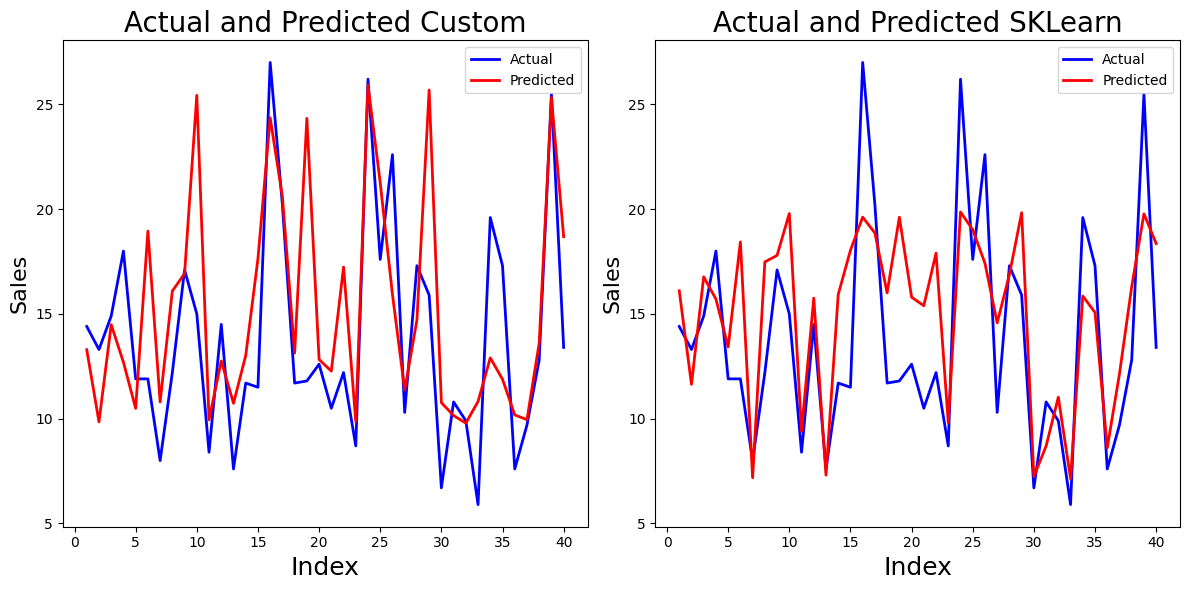

In [73]:
# Actual vs Predicted Custom
counter = [i for i in range(1, y_test.shape[0] + 1, 1)]         
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Create a 1x2 grid of subplots

# Subplot 1: Custom Regression
axes[0].plot(counter, y_test, color="blue", linewidth=2, linestyle="-", label='Actual')
axes[0].plot(counter, polynomial_regression_predict(x_test, a, b, c), color="red", linewidth=2, linestyle="-", label='Predicted')
axes[0].set_title('Actual and Predicted Custom', fontsize=20)
axes[0].set_xlabel('Index', fontsize=18)
axes[0].set_ylabel('Sales', fontsize=16)

# Actual vs Predicted SKLearn
# Assuming you want another plot next to the first one
# Subplot 2: SKLearn Regression
axes[1].plot(counter, y_test, color="blue", linewidth=2, linestyle="-", label='Actual')
axes[1].plot(counter, model.predict(poly_features.transform(x_test.reshape(-1, 1))), color="red", linewidth=2, linestyle="-", label='Predicted')
axes[1].set_title('Actual and Predicted SKLearn', fontsize=20)
axes[1].set_xlabel('Index', fontsize=18)
axes[1].set_ylabel('Sales', fontsize=16)

# Add legends for both subplots
axes[0].legend()
axes[1].legend()

# Adjust the layout
plt.tight_layout()

# Show the subplots
plt.show()


In [83]:
print(f"CUSTOM\nA:{a}\nb:{b}\nc:{c}\n")
print(f"SKLEARN\nA:{model.coef_[0]}\nb:{model.coef_[1]}\nc:{model.coef_[2]}\n\n")

mse = mean_squared_error(y_test, model.predict(poly_features.transform(x_test.reshape(-1, 1))))
r_squared = r2_score(y_test, model.predict(poly_features.transform(x_test.reshape(-1, 1))))
print('Mean_Squared_Error SKLearn:' ,mse)
print('r_square_value SKLearn:',r_squared)

mse = mean_squared_error(y_test, polynomial_regression_predict(x_test, a, b, c))
r_squared = r2_score(y_test, polynomial_regression_predict(x_test, a, b, c))
print('\n\nMean_Squared_Error Custom:' ,mse)
print('r_square_value Custom:',r_squared)

CUSTOM
A:0.00034704319082569157
b:-0.04994307627264729
c:11.57959755978883

SKLEARN
A:0.0
b:0.07536453337415054
c:-9.275968434225873e-05


Mean_Squared_Error SKLearn: 14.608727611729677
r_square_value SKLearn: 0.4529380883658828


Mean_Squared_Error Custom: 19.70183331406843
r_square_value Custom: 0.2622134602032682
